#第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

##60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

単語ベクトル：Cbow及びSkip-gram？\
https://deepage.net/bigdata/machine_learning/2016/09/02/word2vec_power_of_word_vector.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from gensim.models import KeyedVectors


if __name__ == "__main__":
    # ref. https://radimrehurek.com/gensim/models/word2vec.html#usage-examples
    model = KeyedVectors.load_word2vec_format('drive/MyDrive/100本ノック/GoogleNews-vectors-negative300.bin.gz', binary=True)
    print(model['United_States'])

##61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

コサイン類似度：2つのベクトルの類似度を示す値。\
cosθ = a・b /|a||b|\
-1 <= cosθ <= 1\
1で完全一致。

In [ ]:
from gensim.models import KeyedVectors


if __name__ == "__main__":
    print(model.similarity('United_States', 'U.S.'))

##62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
from gensim.models import KeyedVectors


if __name__ == "__main__":
    print(model.most_similar('United_States', topn=10))

##63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
from gensim.models import KeyedVectors


if __name__ == "__main__":
    print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

In [ ]:
vec = model['Spain'] - model['Madrid'] + model['Athens'] 
print(model.most_similar([vec], topn=10))

##64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

In [ ]:
!head -10 questions-words.txt

In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [ ]:
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


##65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

  print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
  print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}')

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


##66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

スピアマン相関係数：-1から1の値を取ります． 値の絶対値が大きいほど2つの変数の相関が強いことを表します． 統計学的に相関係数に対する基準はありませんが，目安としては以下のようになります． 一般的には絶対値が0.3以上ある場合に，2つの変数に相関関係があると判定します

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-01-04 11:00:46--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2023-01-04 11:00:47--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   101KB/s    in 0.2s    

2023-01-04 11:00:49 (101 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.26393774]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


##67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

k平均化法：まずデータを適当なクラスタに分けた後、クラスタの平均を用いてうまい具合にデータがわかれるように調整させていくアルゴリズムです。\
https://qiita.com/g-k/items/0d5d22a12a4507ecbf11

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from tqdm import tqdm
tqdm.pandas()




countries_df = pd.read_csv('./countries.tsv', sep='\t', names = ('cry', 'Country'))


# モデルに含まれる国だけを抽出
conclusion_model_countries = [country for country in countries_df['Country'].tolist() if country in model]
countries_df = countries_df[countries_df['Country'].isin(conclusion_model_countries)].reset_index(drop=True)

# 国ベクトルの取得
countries_vec = [model[country] for country in countries_df['Country'].tolist()]

# k-meansクラスタリング
n = 5
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(countries_vec)
for i in range(n):
  cluster = np.where(kmeans.labels_ == i)[0]
  print(f'cluster: {i}')
  print(countries_df.iloc[cluster]["Country"].tolist())

cluster: 0
['Angola', 'Burundi', 'Benin', 'Botswana', 'Cameroon', 'Comoros', 'Djibouti', 'Algeria', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia', 'Kenya', 'Lebanon', 'Liberia', 'Libya', 'Lesotho', 'Morocco', 'Madagascar', 'Mali', 'Mozambique', 'Mauritania', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sudan', 'Senegal', 'Somalia', 'Seychelles', 'Chad', 'Togo', 'Tunisia', 'Uganda', 'Yemen', 'Zambia', 'Zimbabwe']
cluster: 1
['Afghanistan', 'Australia', 'Bangladesh', 'Bahrain', 'Bhutan', 'China', 'Indonesia', 'India', 'Iraq', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Cambodia', 'Kuwait', 'Macao', 'Myanmar', 'Mongolia', 'Malaysia', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Singapore', 'Thailand', 'Tajikistan', 'Turkmenistan', 'Taiwan', 'Uzbekistan']
cluster: 2
['Fiji', 'Guam', 'Kiribati', 'Maldives', 'Mayotte', 'Niue', 'Nauru', 'Pitcairn', 'Palau', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Samoa']
cluster: 3
['Aruba', 'Anguilla', 'Argentina', 'Antarct

##68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

Ward：最も似ている組み合わせから順番にまとまり（クラスター）にしていく方法で、途中過程が階層のように表せ、最終的に図10のような樹形図（デンドログラム）ができます。結合後の代表点は二点の重心である。\
https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering

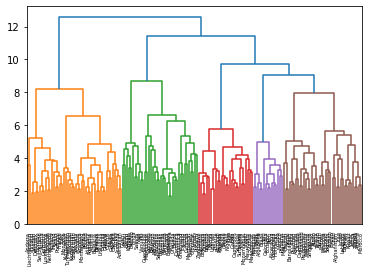

<Figure size 1080x360 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Ward法によるクラスタリング
plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries_df['Country'].tolist())


plt.show()

##69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

t-sne：高次元データを2次元又は3次元に変換して可視化するための次元削減アルゴリズム\
https://qiita.com/g-k/items/120f1cf85ff2ceae4aba

In [ ]:
!pip install bhtsne

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()

参考文献：https://www.takapy.work/entry/2021/06/20/191606